In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim


df =pd.read_csv('df-climatechange.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df['Risk Percepetion Level'] = ['Worried Citizens' if x >= 6 else 'Unworried Citizens' for x in df['risk perception']]
df['pro-environmental behaviour'] = df['pro-environmental behaviour'].replace({0: 'No', 1:'Yes'})

df1 = df[df['risk perception'] >= 6]
df2 = df[df['risk perception'] <= 5]
df.head()

,risk perception,pro-environmental behaviour,benefits for companies,benefits for citizens,renewable energy,energy efficient,greenhouse gas,political orientation,gender,age,living,stop education,social class,marital status,country,green-identity,cultural schemas,qb1a,Risk Percepetion Level
0,4.0,No,2,2,2,2,2,Centre-left,Man,20,Large town,Still studying,The middle class of society,Single,Belgium,moderate,1,Climate change,Unworried Citizens
1,5.0,No,2,2,2,2,2,Centre-left,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,moderate,1,The increasing global population,Unworried Citizens
2,6.0,No,2,2,2,1,1,Centre-left,Man,80,Large town,Refusal/dk,The lower middle class of society,Single,Belgium,moderate,2,Climate change,Worried Citizens
3,6.0,Yes,2,2,2,2,2,Centre,Man,40,Large town,Refusal/dk,The lower middle class of society,Partner and children,Belgium,moderate,1,"Poverty, hunger and lack of drinking water",Worried Citizens
4,5.0,Yes,3,3,2,3,2,Centre,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,moderate,2,Proliferation of nuclear weapons,Unworried Citizens


#### data exploration of the variables

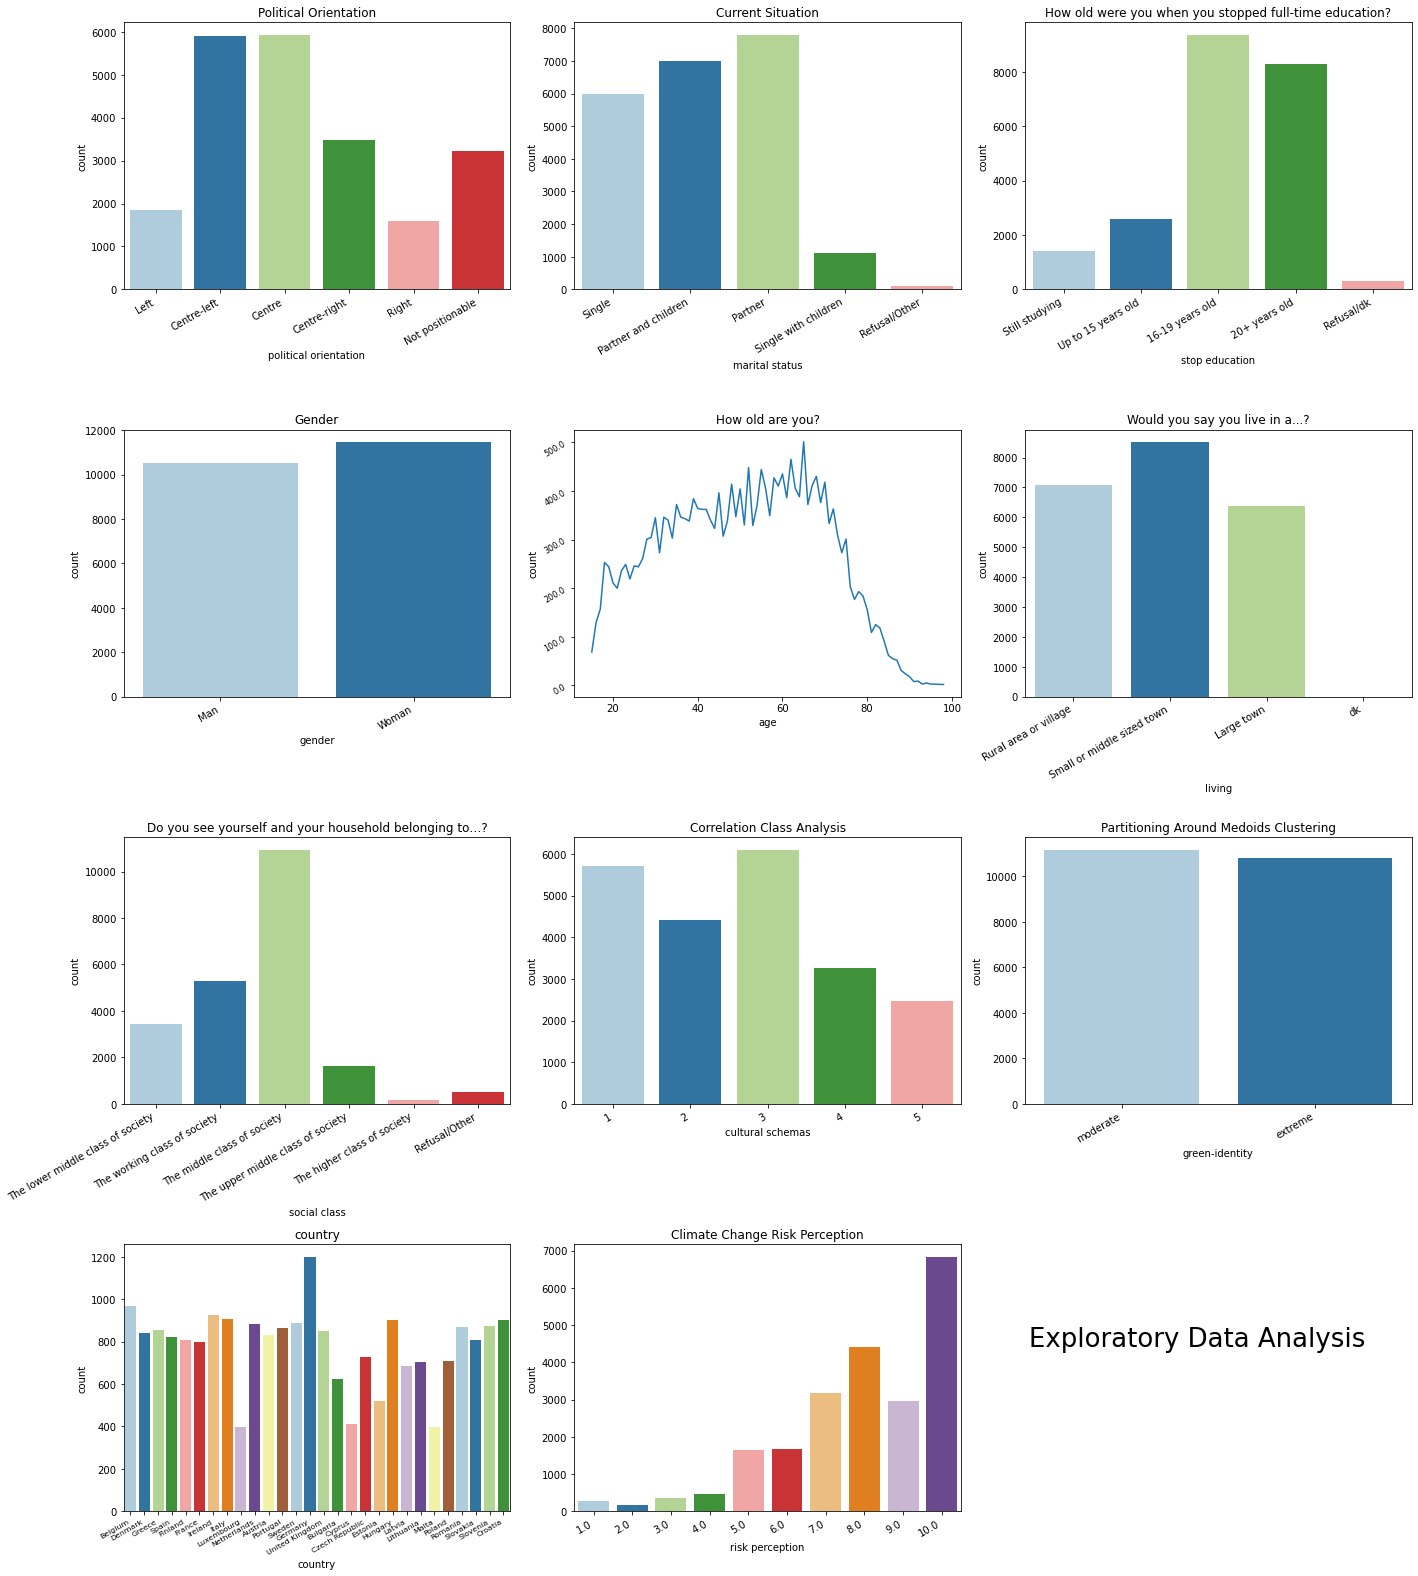

In [2]:
f, axes = plt.subplots(4, 3, figsize=(20, 22))
sns.countplot(x=df['political orientation'], palette="Paired", order=['Left','Centre-left','Centre','Centre-right','Right','Not positionable'],ax= axes[0, 0]).set_title('Political Orientation')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
sns.countplot(x=df['marital status'], palette="Paired",ax= axes[0, 1]).set_title('Current Situation')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
sns.countplot(x=df['stop education'], palette="Paired",ax= axes[0, 2],order=['Still studying','Up to 15 years old','16-19 years old','20+ years old','Refusal/dk']).set_title('How old were you when you stopped full-time education?')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
sns.countplot(x=df['gender'], palette="Paired",ax= axes[1, 0]).set_title('Gender')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
age = df.groupby('age').count().reset_index()
sns.lineplot(x=age['age'], y = age['risk perception'], palette="Paired",ax= axes[1, 1]).set_title('How old are you?')
axes[1,1].set(ylabel='count')
axes[1,1].set_yticklabels(axes[1,1].get_yticks(), size = 8,rotation=30, ha="right")

sns.countplot(x=df['living'], palette="Paired",ax= axes[1, 2],order=['Rural area or village','Small or middle sized town','Large town','dk']).set_title('Would you say you live in a...?')
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
sns.countplot(x=df['social class'], palette="Paired",ax= axes[2, 0],order=['The lower middle class of society','The working class of society','The middle class of society','The upper middle class of society', 'The higher class of society', 'Refusal/Other']).set_title('Do you see yourself and your household belonging to…?')
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
sns.countplot(x=df['cultural schemas'], palette="Paired",ax= axes[2, 1]).set_title('Correlation Class Analysis')
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
sns.countplot(x=df['green-identity'], palette="Paired",ax= axes[2, 2]).set_title('Partitioning Around Medoids Clustering')
axes[2,2].set_xticklabels(axes[2,2].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
sns.countplot(x=df['country'], palette="Paired",ax= axes[3, 0]).set_title('country')
axes[3,0].set_xticklabels(axes[3,0].get_xticklabels(),rotation=30, ha="right",fontsize = 7.8)
sns.countplot(x=df['risk perception'], palette="Paired",ax= axes[3, 1]).set_title('Climate Change Risk Perception')
axes[3,1].set_xticklabels(axes[3,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

f.delaxes(axes[3,2]) #The indexing is zero-based here
plt.tight_layout()
f.suptitle('Exploratory Data Analysis ', fontsize = 26, x = 0.84, y = 0.16)
f.savefig("eda.png")


In [9]:
sns.color_palette("Paired")[4]

(0.984313725490196, 0.6039215686274509, 0.6)

#### EDA based on individual risk perception level

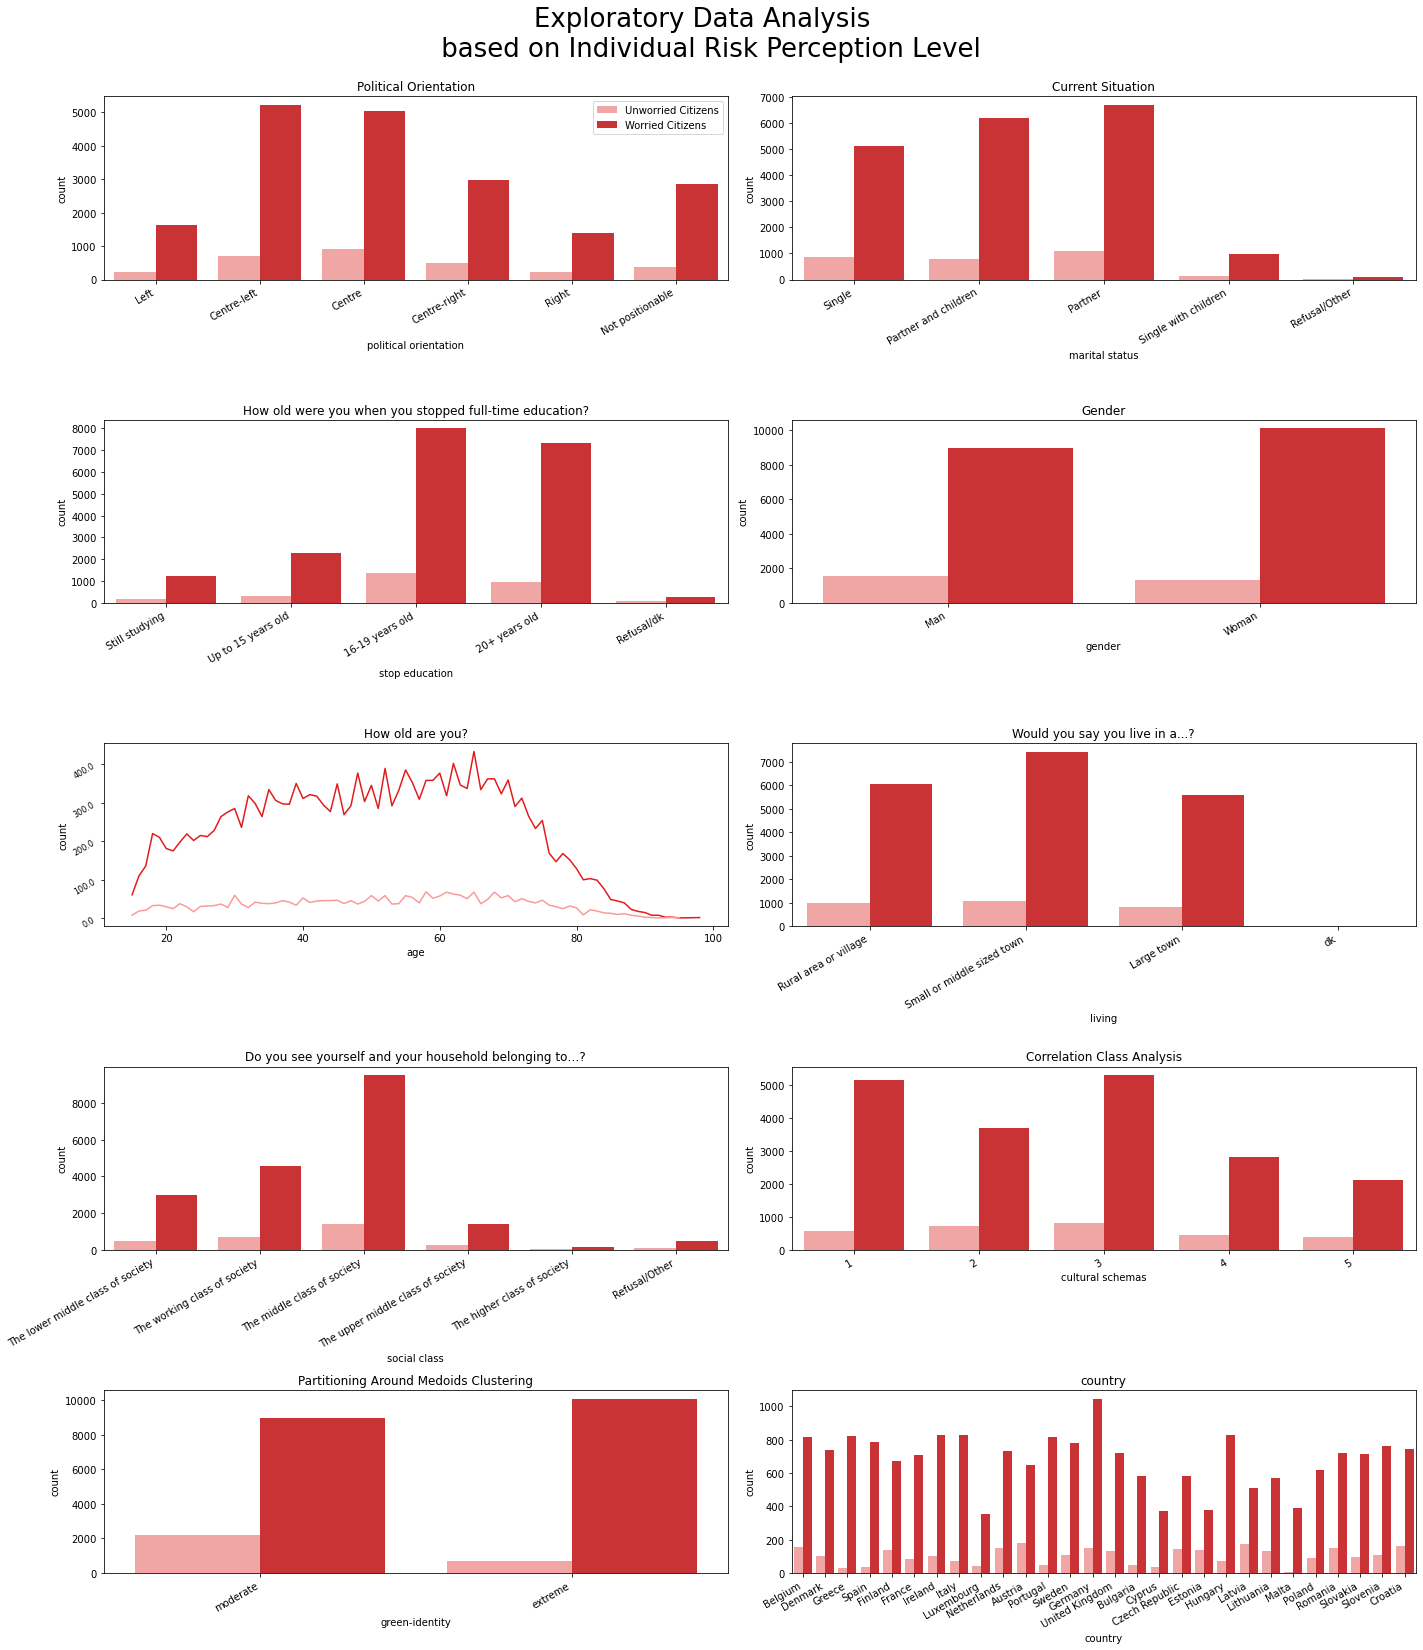

In [4]:
f, axes = plt.subplots(5, 2, figsize=(20, 22))
color = [sns.color_palette("Paired")[4], sns.color_palette("Paired")[5]]

sns.countplot(x=df['political orientation'],hue=df['Risk Percepetion Level'], palette=color, order=['Left','Centre-left','Centre','Centre-right','Right','Not positionable'],ax= axes[0, 0]).set_title('Political Orientation')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

sns.countplot(x=df['marital status'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[0, 1]).set_title('Current Situation')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

sns.countplot(x=df['stop education'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[1,0],order=['Still studying','Up to 15 years old','16-19 years old','20+ years old','Refusal/dk']).set_title('How old were you when you stopped full-time education?')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

sns.countplot(x=df['gender'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[1,1]).set_title('Gender')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

age = df.groupby(['age','Risk Percepetion Level']).count().reset_index()
age1 = age[age['Risk Percepetion Level']=='Worried Citizens']
age2 = age[age['Risk Percepetion Level']=='Unworried Citizens']
sns.lineplot(x=age1['age'], y = age1['risk perception'], color =color[1],ax= axes[2, 0]).set_title('How old are you?')
sns.lineplot(x=age2['age'], y = age2['risk perception'], color = color[0],ax= axes[2, 0])

axes[2,0].set(ylabel='count')
axes[2,0].set_yticklabels(axes[2,0].get_yticks(), size = 8,rotation=30, ha="right")

sns.countplot(x=df['living'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[2,1],order=['Rural area or village','Small or middle sized town','Large town','dk']).set_title('Would you say you live in a...?')
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

sns.countplot(x=df['social class'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[3,0],order=['The lower middle class of society','The working class of society','The middle class of society','The upper middle class of society', 'The higher class of society', 'Refusal/Other']).set_title('Do you see yourself and your household belonging to…?')
axes[3,0].set_xticklabels(axes[3,0].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

sns.countplot(x=df['cultural schemas'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[3,1]).set_title('Correlation Class Analysis')
axes[3,1].set_xticklabels(axes[3,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

sns.countplot(x=df['green-identity'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[4,0]).set_title('Partitioning Around Medoids Clustering')
axes[4,0].set_xticklabels(axes[4,0].get_xticklabels(),rotation=30, ha="right",fontsize = 10)

sns.countplot(x=df['country'],hue=df['Risk Percepetion Level'], palette=color,ax= axes[4,1]).set_title('country')
axes[4,1].set_xticklabels(axes[4,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
#sns.countplot(x=df['qb2'],hue=df['risk percepetion'], palette="Set3",ax= axes[3, 1]).set_title('Climate Change Risk Perception')
#axes[3,1].set_xticklabels(axes[3,1].get_xticklabels(),rotation=30, ha="right",fontsize = 10)
axes[0,0].legend(loc = 'best')
#axes[0,0].get_legend().remove()
axes[0,1].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
#axes[2,0].get_legend().remove()
axes[2,1].get_legend().remove()

axes[3,0].get_legend().remove()
axes[3,1].get_legend().remove()
axes[4,0].get_legend().remove()
axes[4,1].get_legend().remove()



#f.delaxes(axes[3,2]) #The indexing is zero-based here
#f.delaxes(axes[3,1])
plt.tight_layout()
f.suptitle('Exploratory Data Analysis \n based on Individual Risk Perception Level', fontsize = 26,y=1.04)
f.savefig("eda2-versione2.png")

In [8]:
P = df.groupby('Risk Percepetion Level')['risk perception'].count().reset_index()
P['perc'] = 100 * P['risk perception']  / P['risk perception'].sum()

P

,Risk Percepetion Level,risk perception,perc
0,Obs. with high-risk perception,19072,86.777687
1,Obs. with low-risk perception,2906,13.222313


#### Count observations of dependent variable: qb5

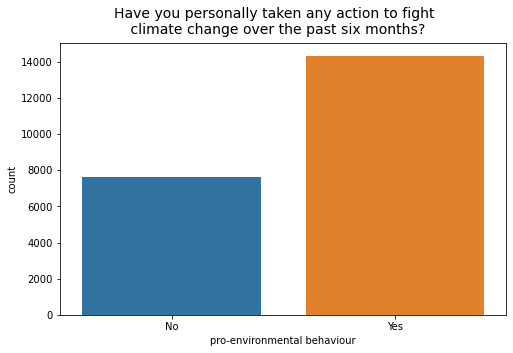

In [9]:
plt.subplots(ncols=1, sharey=True, figsize = (8,5))         

sns.countplot(x=df['pro-environmental behaviour'])
plt.suptitle('Have you personally taken any action to fight \n climate change over the past six months?', fontsize = 14)


plt.savefig('qb5-count-cc.png')

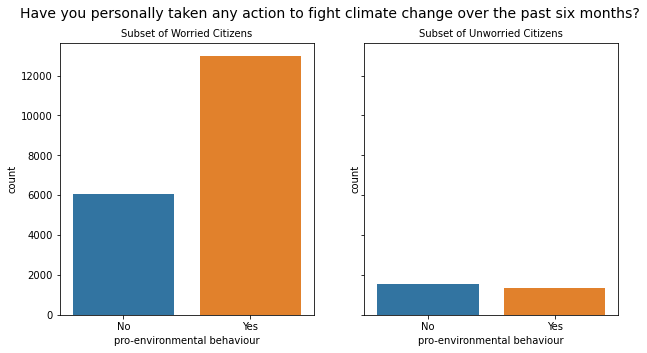

In [11]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10,5))         

sns.countplot(x=df1['pro-environmental behaviour'], ax=ax1).set_title('Subset of Worried Citizens', fontsize = 10)
sns.countplot(x=df2['pro-environmental behaviour'], ax=ax2).set_title('Subset of Unworried Citizens', fontsize = 10)

plt.suptitle('Have you personally taken any action to fight climate change over the past six months?',fontsize = 14)

plt.savefig('qb5-count-2subset.png')

#### Macro-level

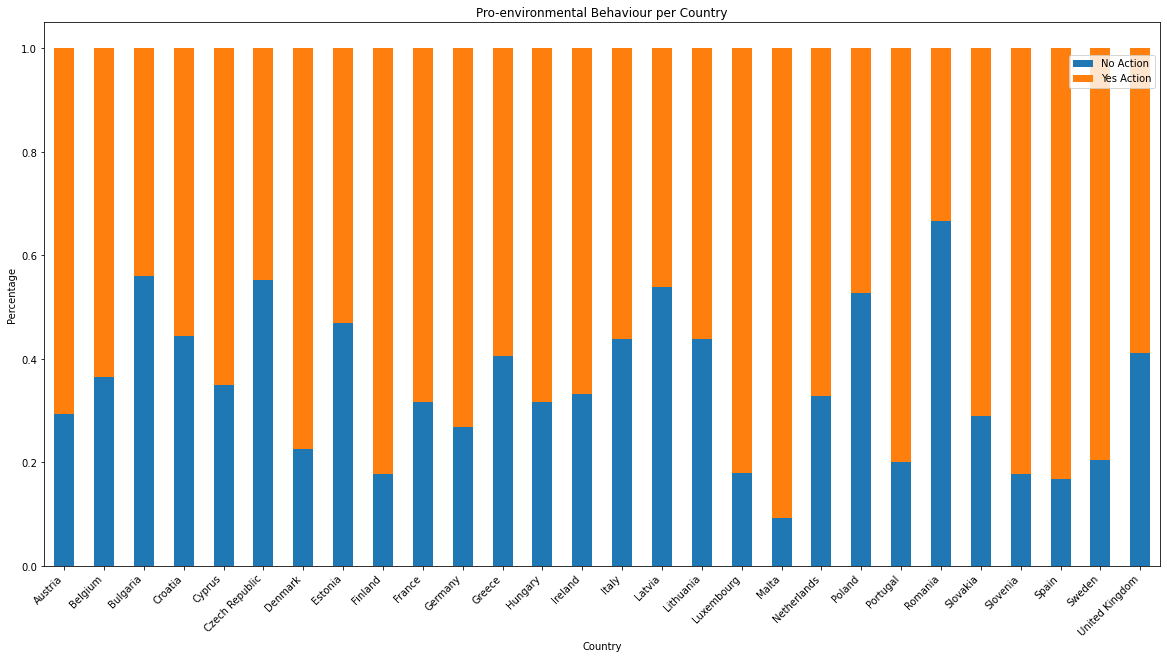

In [18]:
freq_df =  df.groupby(['country'])['pro-environmental behaviour'].value_counts().unstack()


pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)
   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("Pro-environmental Behaviour per Country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
ax.legend(["No Action", "Yes Action"], bbox_to_anchor=(1,0.95), loc="upper right");

plt.savefig('Pro-environmental Behaviour per Country.png', bbox_inches='tight')
# Display the graph on the screen
plt.show()


In [20]:
df.head()

,qb1a,risk perception,pro-environmental behaviour,benefits for companies,benefits for citizens,renewable energy,energy efficient,greenhouse,political orientation,gender,age,living,stop education,social class,marital status,country,green-identity,Risk Percepetion Level
0,Climate change,4.0,No,2,2,2,2,2,Centre-letf,Man,20,Large town,Still studying,The middle class of society,Single,Belgium,moderate,Obs. with low-risk perception
1,The increasing global population,5.0,No,2,2,2,2,2,Centre-letf,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,moderate,Obs. with low-risk perception
2,Climate change,6.0,No,2,2,2,1,1,Centre-letf,Man,80,Large town,Refusal/dk,The lower middle class of society,Single,Belgium,moderate,Obs. with high-risk perception
3,"Poverty, hunger and lack of drinking water",6.0,Yes,2,2,2,2,2,Centre,Man,40,Large town,Refusal/dk,The lower middle class of society,Partner and children,Belgium,moderate,Obs. with high-risk perception
4,Proliferation of nuclear weapons,5.0,Yes,3,3,2,3,2,Centre,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,moderate,Obs. with low-risk perception


#### Plot cluster 

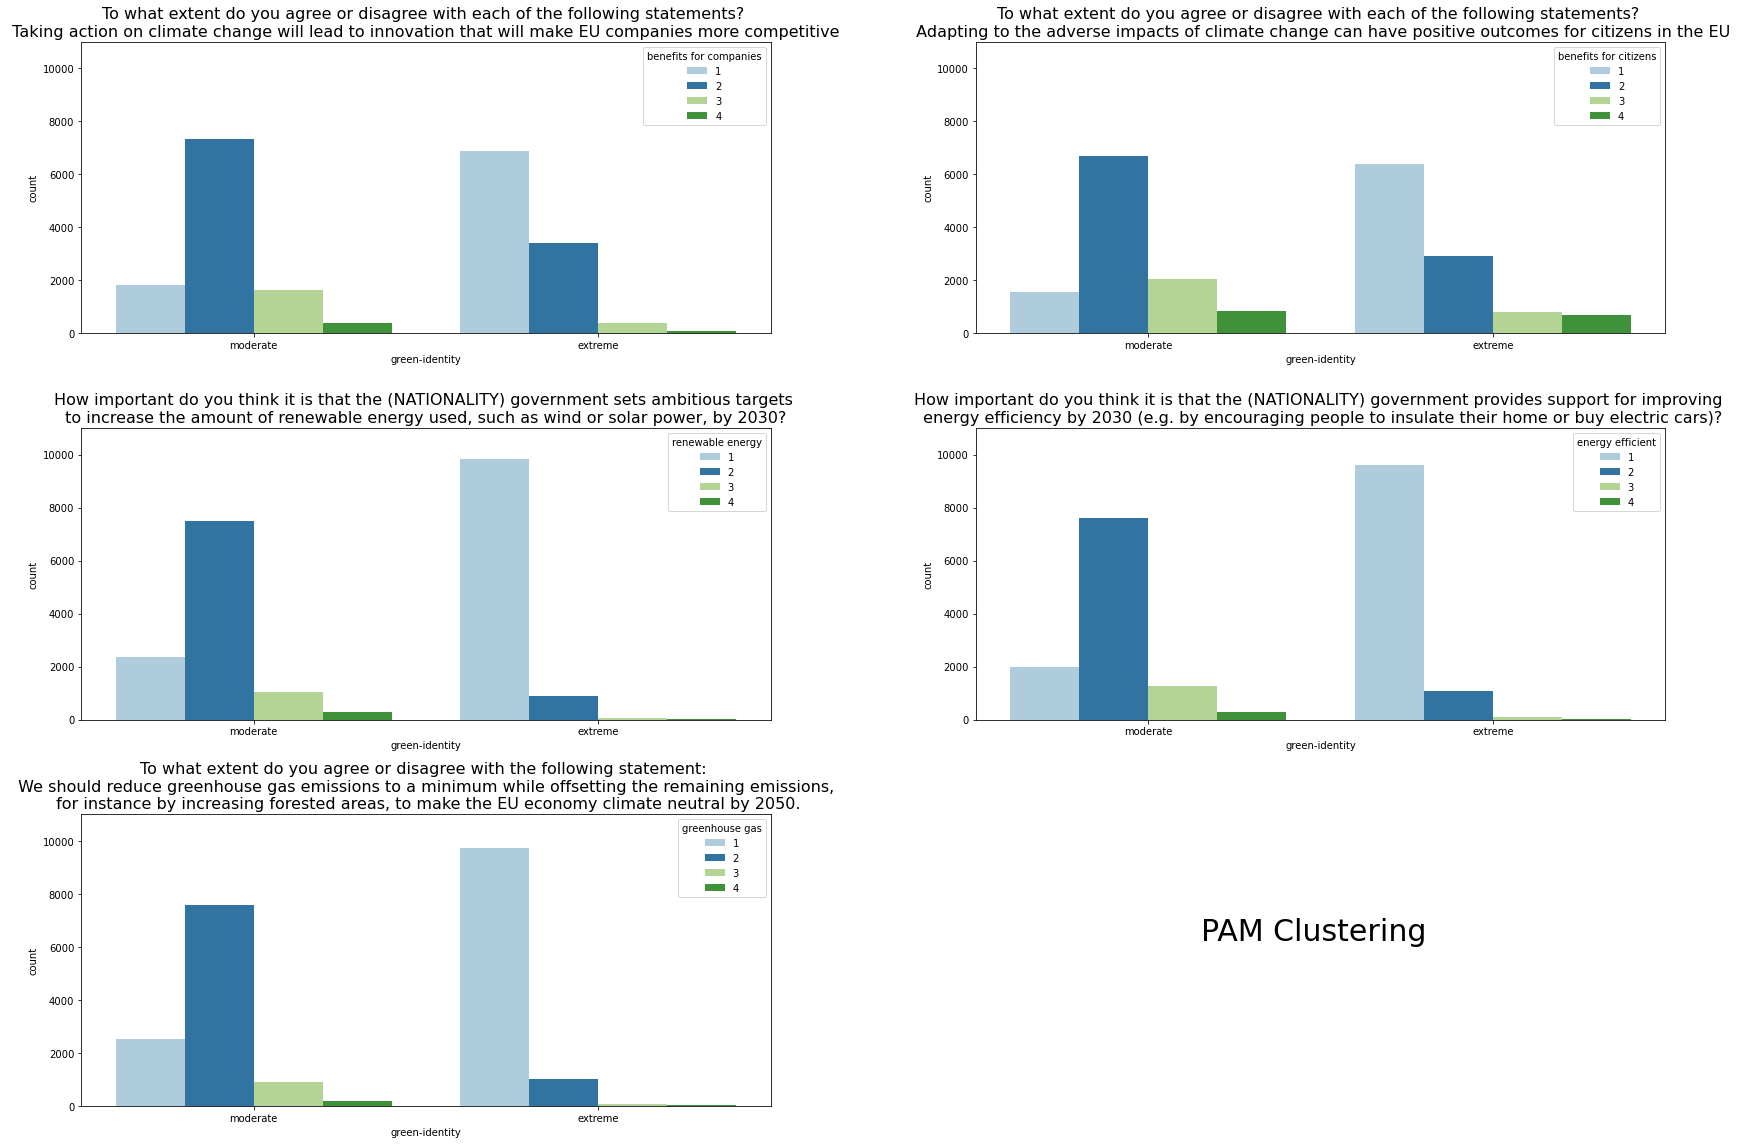

In [5]:
f, axes = plt.subplots(3, 2, figsize=(25, 16))

sns.countplot(x=df['green-identity'],hue=df['benefits for companies'], palette="Paired",ax= axes[0, 0]).set_title('To what extent do you agree or disagree with each of the following statements? \n Taking action on climate change will lead to innovation that will make EU companies more competitive ',fontsize=16) 
sns.countplot(x=df['green-identity'],hue=df['benefits for citizens'],palette="Paired", ax=axes[0, 1]).set_title("To what extent do you agree or disagree with each of the following statements? \n Adapting to the adverse impacts of climate change can have positive outcomes for citizens in the EU",fontsize=16)
sns.countplot(x=df['green-identity'],hue=df['renewable energy'], palette="Paired",ax=axes[1, 0]).set_title("How important do you think it is that the (NATIONALITY) government sets ambitious targets \n to increase the amount of renewable energy used, such as wind or solar power, by 2030? ",fontsize=16)
sns.countplot(x=df['green-identity'],hue=df['energy efficient'],palette="Paired",ax= axes[1, 1]).set_title("How important do you think it is that the (NATIONALITY) government provides support for improving \n energy efficiency by 2030 (e.g. by encouraging people to insulate their home or buy electric cars)?",fontsize=16)
sns.countplot(x=df['green-identity'],hue=df['greenhouse gas'], palette="Paired",ax=axes[2, 0]).set_title("To what extent do you agree or disagree with the following statement: \n We should reduce greenhouse gas emissions to a minimum while offsetting the remaining emissions, \n for instance by increasing forested areas, to make the EU economy climate neutral by 2050.",fontsize=16)

axes[0, 0].set_ylim(0,11000)
axes[0, 1].set_ylim(0,11000)
axes[1, 0].set_ylim(0,11000)
axes[1, 1].set_ylim(0,11000)
axes[2, 0].set_ylim(0,11000)

axes[0, 1].legend(loc = 'upper right', title='benefits for citizens')

f.delaxes(axes[2,1]) #The indexing is zero-based here

f.suptitle('PAM Clustering ', fontsize = 30, x = 0.75, y = 0.2) 

plt.tight_layout()

#plt.savefig('PAM_clustering2.png')
plt.show()

#### Plot CCA

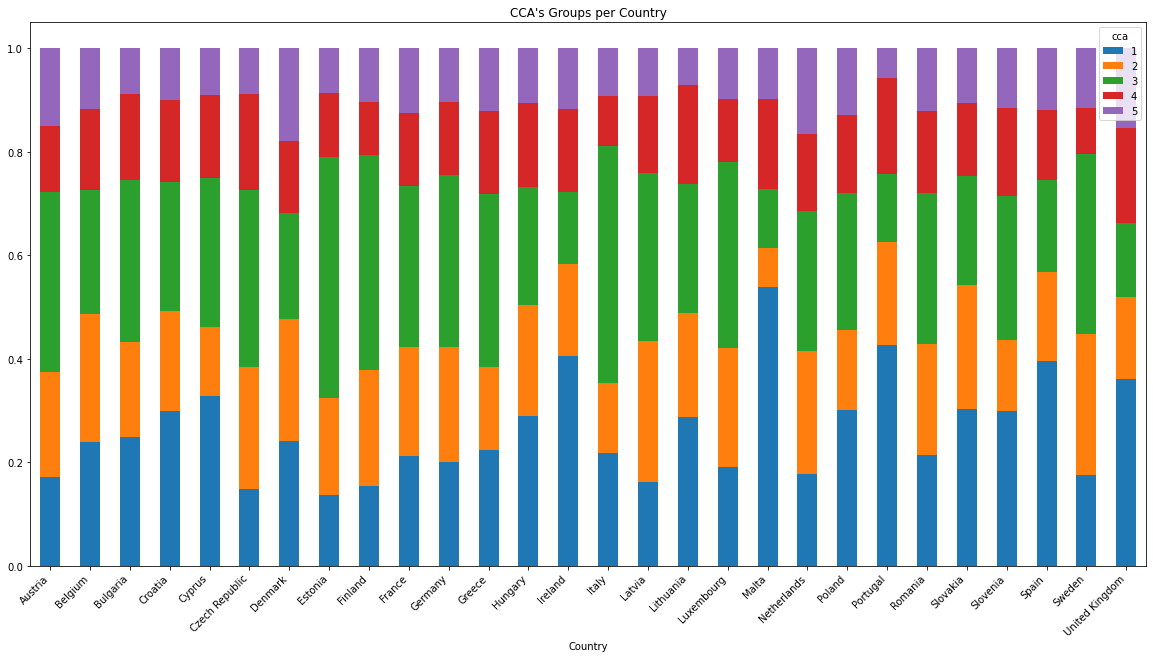

In [2]:
freq_df =  df.groupby(['country'])['cca'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax = pct_df.plot(kind="bar", stacked=True)

   
plt.gcf().set_size_inches(20, 10)


# Add labels and title
plt.title("CCA's Groups per Country")
plt.xlabel("Country")
#plt.ylabel("Average attitude towards the problem of climate change")
plt.xticks(rotation=45, ha='right')


#save 
plt.savefig('cca_country.png')

# Display the graph on the screen
plt.show()


#### Some maps

In [31]:
#map 
c = df.groupby('country').mean().reset_index()


In [32]:
c#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [33]:
get_continent(c.country)

('Unknown', 'Unknown')

In [34]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

c['lat'] = np.nan
c['long'] = np.nan
for i in range(len(c)):
        # Geolocate the center of the country
    loc = geolocator.geocode(c.country[i])
        # And return latitude and longitude
    c['lat'][i] = float(loc.latitude)
    c['long'][i] = float(loc.longitude)


C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\l

In [95]:
c['country'][5] =  'Czech Rep.'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
# definition of the boundaries in the map: crime total in two years
import json
communities_geo = r'european-union-countries.geojson'
# open the json file - json.load() methods returns a python dictionary
with open(communities_geo) as communities_file:
    communities_json = json.load(communities_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file
denominations_json = []
for index in range(len(communities_json['features'])):
    denominations_json.append(communities_json['features'][index]['properties']['name'])
    

In [19]:
###############################################################################
#                         14. Make Choropleth Crime Map                      #
###############################################################################
# Create base map

import folium
# Get Lat and Long
lats = c["lat"].values
lngs = c["long"].values

communities_map = folium.Map(location=[np.mean(lats), np.mean(lngs)], 
               tiles = 'cartodbpositron', zoom_start = 5) #oppure metti 'Stamen Toner' su tiles


communities_map.choropleth(geo_data = communities_geo, 
            data = c,
            columns = ['country', 'qb2'],
            name='choropleth',
              key_on = 'feature.properties.name',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Average attitude towards climate change risk perception',
               highlight = True)
#display(communities_map)

# Add a control button
#folium.map.LayerControl('topleft', collapsed= False).add_to(m)
communities_map.save('Map-qb2.html') 

In [4]:
country = df.groupby('country').count().reset_index()
country = country.rename(columns={'qb1a': 'N'})


cc = df.groupby(['country','qb1a']).count().reset_index()
cc = cc.loc[cc['qb1a'] == 'Climate change']
cc = cc[['country', 'political orientation']]
cc = cc.rename(columns={'political orientation': 'count_climatechange'})

result =pd.merge(cc, country, how='left', left_on='country', right_on='country')
result['percent'] = result['count_climatechange']/result['N']*100





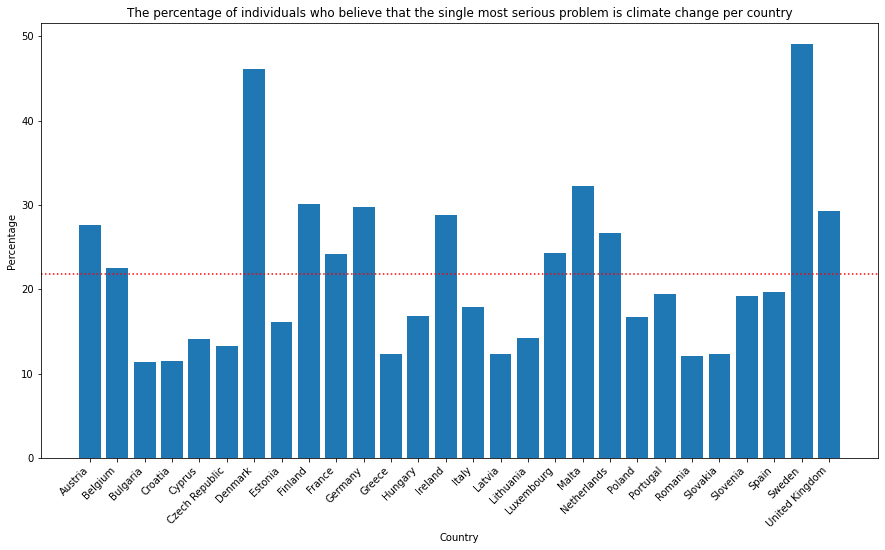

In [5]:
plt.figure(figsize=(15,8))

country = result.country
unit = result.percent
 
# Plot the bar graph
plot = plt.bar(country, unit)


# Add labels and title
plt.title("The percentage of individuals who believe that the single most serious problem is climate change per country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')

#####horizontal line
plt.axhline(y=result.percent.mean(), color='r', linestyle='dotted')


plt.savefig('The percentage of individuals who believe that the single most serious problem is climate change per country.png', bbox_inches='tight')


# Display the graph on the screen
plt.show()


#### 1. EPI 

In [2]:
EPI =pd.read_csv('epi2020results20200604.csv') 
eu = ['Austria','Italy', 'Belgium','Latvia', 'Bulgaria','Lithuania', 'Croatia','Luxembourg', 'Cyprus','Malta', 'Czech Republic', 'Netherlands','Denmark',
      'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovakia', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary','Sweden', 'Ireland', 'United Kingdom']

eu.sort()
print(eu)

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


In [3]:
EPI = EPI[EPI.country.isin(eu)]

EPI = EPI[['country', 'EPI.new', 'HLT.new', 'ECO.new']]
EPI = EPI.reset_index()
EPI = EPI.drop('index', axis = 1)


EPI.head()

,country,EPI.new,HLT.new,ECO.new
0,Austria,79.6,88.0,74.0
1,Belgium,73.3,86.0,64.8
2,Bulgaria,57.0,50.3,61.5
3,Cyprus,64.8,81.5,53.7
4,Czech Republic,71.0,68.3,72.9


In [111]:
geolocator = Nominatim()

EPI['lat'] = np.nan
EPI['long'] = np.nan
for i in range(len(EPI)):
        # Geolocate the center of the country
    loc = geolocator.geocode(EPI.country[i])
        # And return latitude and longitude
    EPI['lat'][i] = float(loc.latitude)
    EPI['long'][i] = float(loc.longitude)


C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\l

In [113]:
EPI['country'][4] =  'Czech Rep.'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
lats = EPI["lat"].values
lngs = EPI["long"].values

communities_map = folium.Map(location=[np.mean(lats), np.mean(lngs)], 
               tiles = 'cartodbpositron', zoom_start = 5) #oppure metti 'Stamen Toner' su tiles


communities_map.choropleth(geo_data = communities_geo, 
            data = EPI,
            columns = ['country', 'EPI.new'],
            name='choropleth',
              key_on = 'feature.properties.name',
              fill_color = 'YlGn', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Environmental Performance Index (EPI)-2020',
               highlight = True)


# Add a control button
#folium.map.LayerControl('topleft', collapsed= False).add_to(m)
communities_map.save('EPI.html') 

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### 2. CCPI

In [5]:
CP =pd.read_csv('Climate Policy 2019.csv', sep = ',', header = None) 
CP = CP.rename({0: 'rank', 1: 'country', 2: 'climate_policy', 3: 'overall rating', 4: 'national cp'}, axis='columns')

CP['country'][31] = 'Slovakia'
CP = CP[CP.country.isin(eu)].reset_index()


len(CP)

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


28

In [22]:
geolocator = Nominatim()

CP['lat'] = np.nan
CP['long'] = np.nan
for i in range(len(CP)):
        # Geolocate the center of the country
    loc = geolocator.geocode(CP.country[i])
        # And return latitude and longitude
    CP['lat'][i] = float(loc.latitude)
    CP['long'][i] = float(loc.longitude)

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\giusp\AppData\Local\

In [23]:
CP['country'][15] =  'Czech Rep.'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
# Get Lat and Long
lats = CP["lat"].values
lngs = CP["long"].values

communities_map = folium.Map(location=[np.mean(lats), np.mean(lngs)], 
               tiles = 'cartodbpositron', zoom_start = 5) #oppure metti 'Stamen Toner' su tiles


communities_map.choropleth(geo_data = communities_geo, 
            data = CP,
            columns = ['country', 'climate_policy'],
            name='choropleth',
              key_on = 'feature.properties.name',
              fill_color = 'YlGnBu', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Climate Change Policy-2019',
               highlight = True)
#display(communities_map)

# Add a control button
#folium.map.LayerControl('topleft', collapsed= False).add_to(m)
communities_map.save('CP.html') 